In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../input/all-stock-5years/all_stocks_5yr.csv')
df.sample(7)

,date,open,high,low,close,volume,Name
513577,2014-05-14,43.36,44.000,43.320,43.73,4691951,SO
19429,2015-04-09,13.08,13.110,12.930,13.05,2901473,AES
102973,2016-06-29,52.50,53.050,52.270,52.76,2404110,CBS
494827,2014-11-24,39.12,39.275,38.955,39.13,1266485,RSG
16292,2017-10-20,235.36,242.990,235.360,239.37,900838,ADS
144440,2013-02-22,20.81,20.930,20.720,20.90,20483295,CSCO
11460,2013-08-14,38.58,38.810,38.350,38.54,3738528,ADM


In [3]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [4]:
df.shape

(619040, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [10]:
print(df[df['Name']=='AAL'])

           date   open   high    low  close    volume Name
0    2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1    2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2    2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3    2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4    2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...         ...    ...    ...    ...    ...       ...  ...
1254 2018-02-01  54.00  54.64  53.59  53.88   3623078  AAL
1255 2018-02-02  53.49  53.99  52.03  52.10   5109361  AAL
1256 2018-02-05  51.99  52.39  49.75  49.76   6878284  AAL
1257 2018-02-06  49.32  51.50  48.79  51.18   6782480  AAL
1258 2018-02-07  50.91  51.98  50.89  51.40   4845831  AAL

[1259 rows x 7 columns]


In [11]:
companies = df['Name'].sample(6).unique()
companies

array(['PCAR', 'DPS', 'FL', 'FIS', 'NKE', 'GT'], dtype=object)

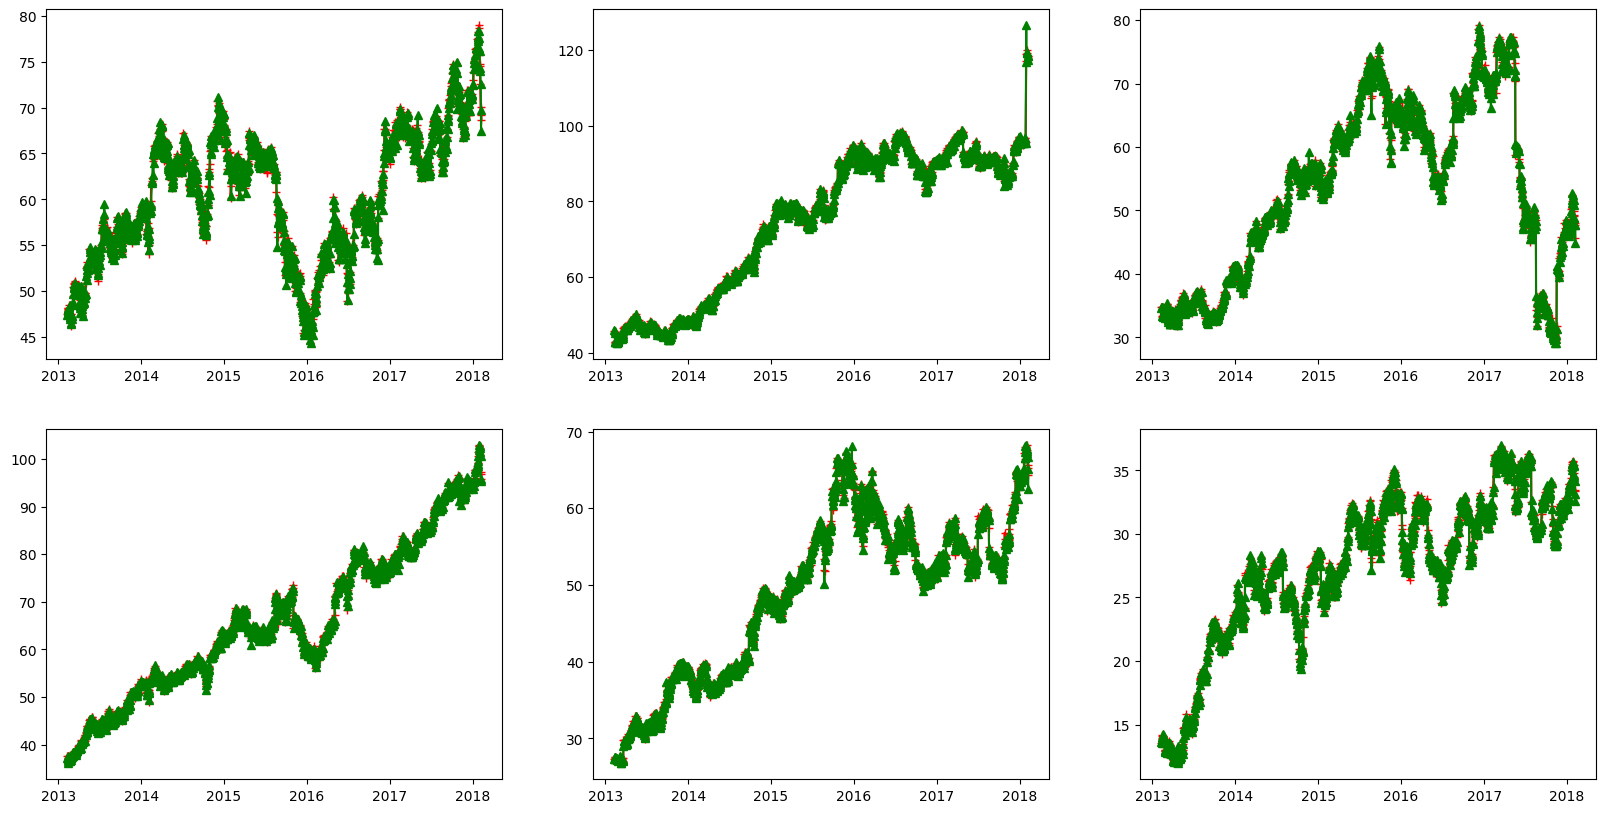

In [12]:
plt.figure(figsize = (20,10))
for i,company in enumerate(companies):
    temp = df[df['Name']==company]
    plt.subplot(2,3,i+1)
    plt.plot(temp['date'], temp['close'], c="r", label="close", marker="+") 
    plt.plot(temp['date'], temp['open'], c="g", label="open", marker="^")
plt.show()

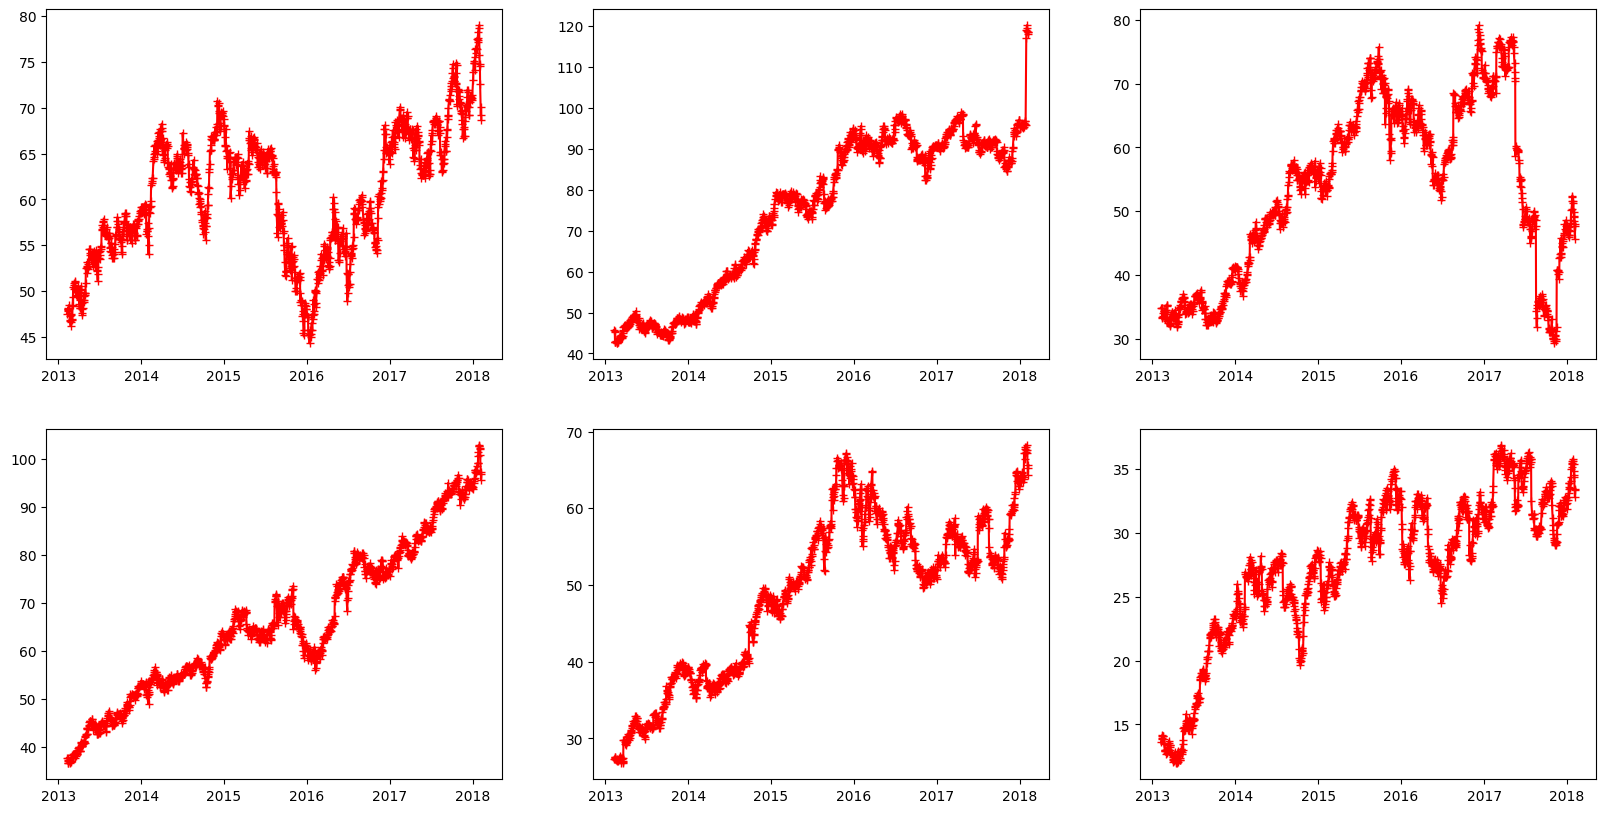

In [13]:
plt.figure(figsize = (20,10))
for i,company in enumerate(companies):
    temp = df[df['Name']==company]
    plt.subplot(2,3,i+1)
    plt.plot(temp['date'], temp['close'], c="r", label="close", marker="+") 
plt.show()

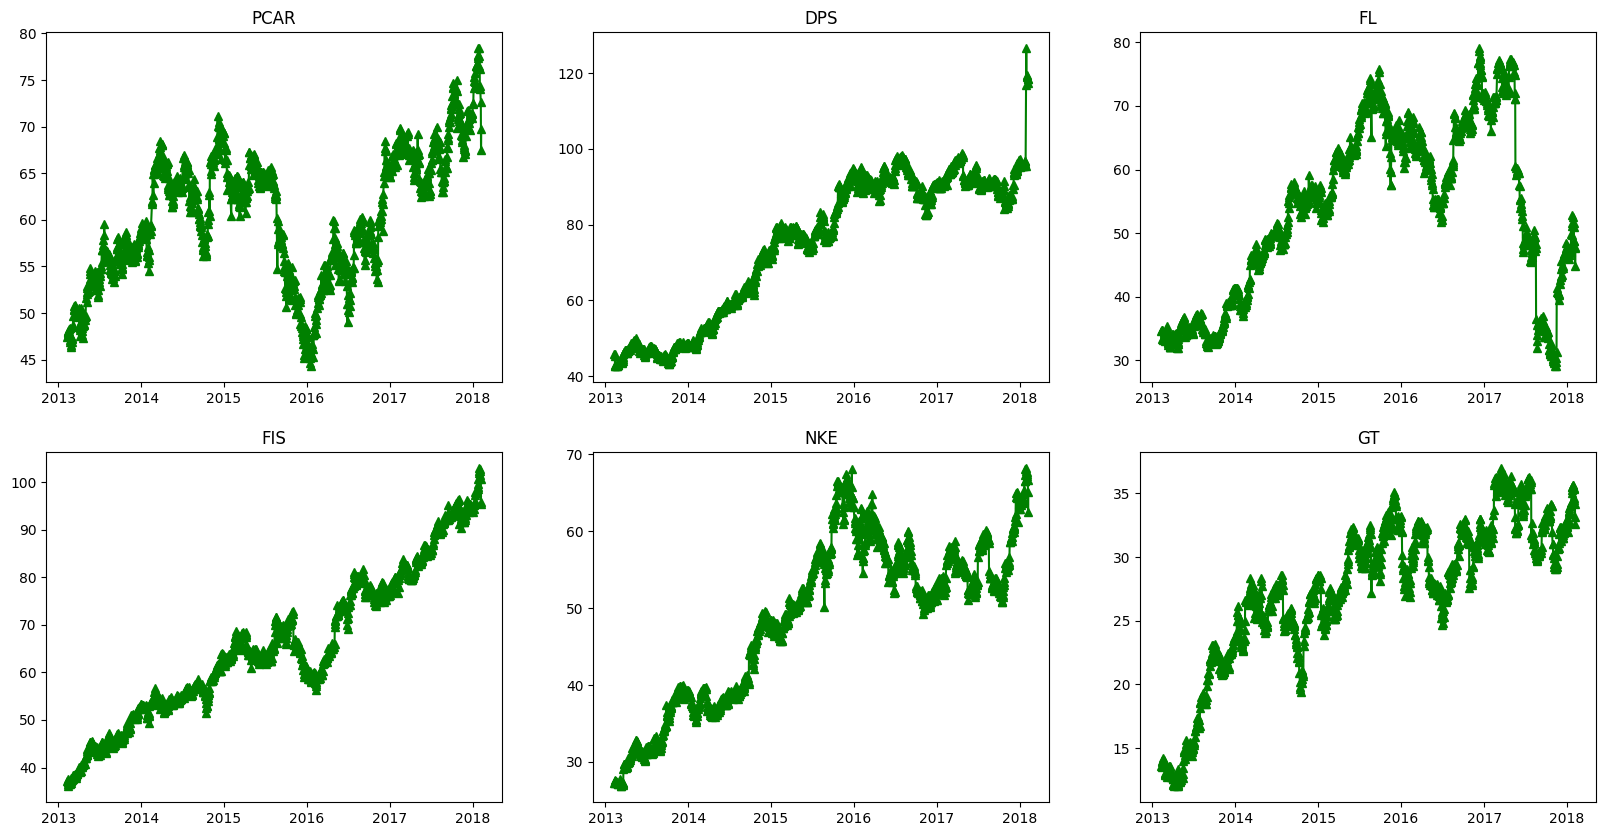

In [14]:
plt.figure(figsize = (20,10))
for i,company in enumerate(companies):
    temp = df[df['Name']==company]
    plt.subplot(2,3,i+1)
    plt.plot(temp['date'], temp['open'], c="g", label="open", marker="^")
    plt.title(f"{company}") 
plt.show()

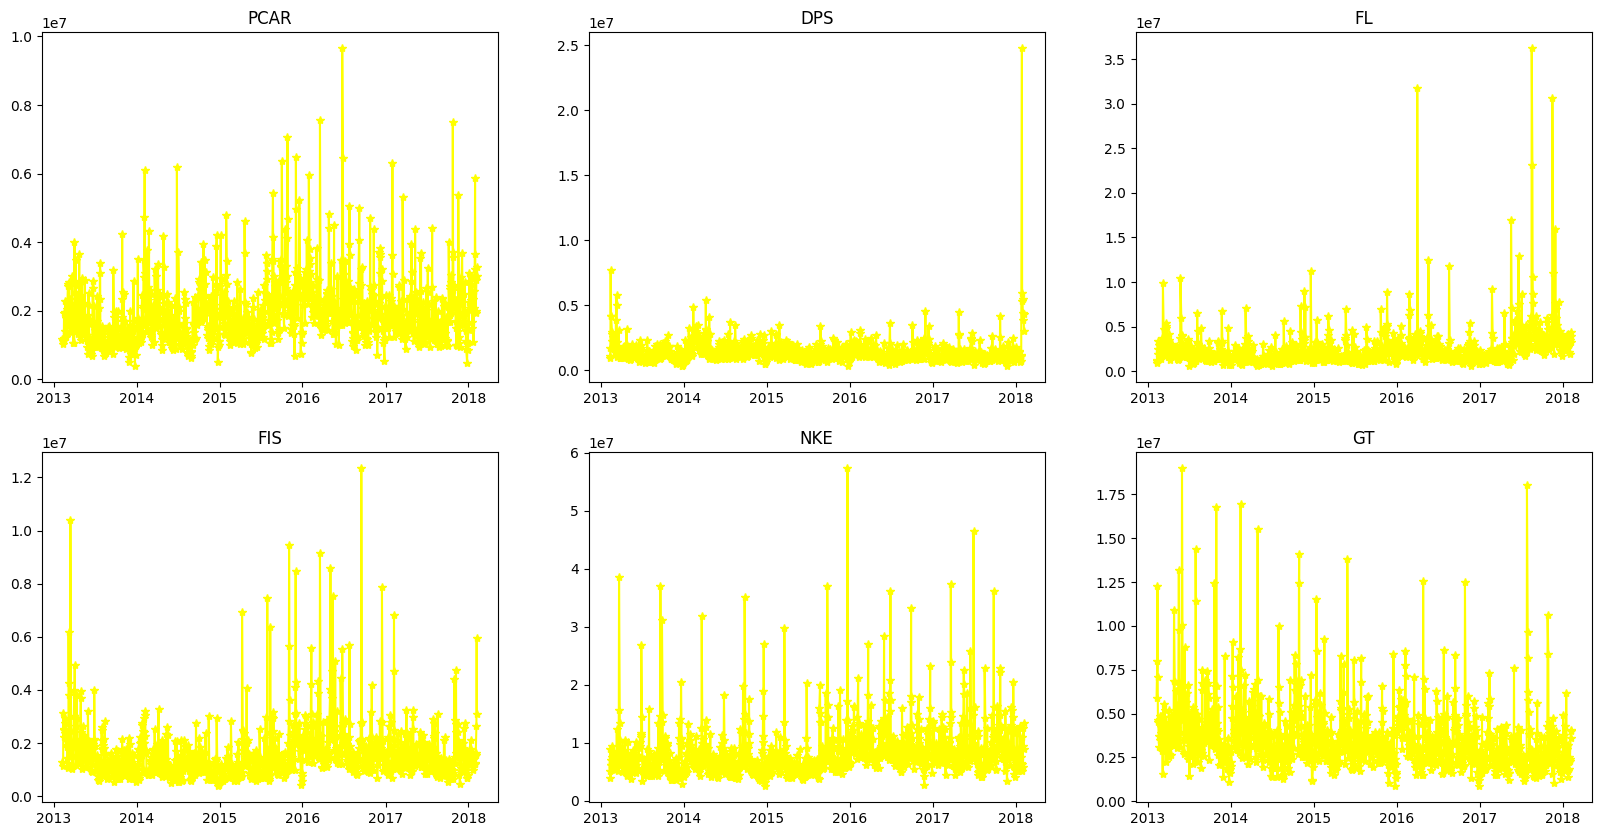

In [15]:
plt.figure(figsize = (20,10))
for i,company in enumerate(companies):
    temp = df[df['Name']==company]
    plt.subplot(2,3,i+1)
    plt.plot(temp['date'], temp['volume'], c="yellow", marker="*")
    plt.title(f"{company}")
plt.show()

In [16]:
company = companies[0]
company
# this to train model the data over first company form sample

'PCAR'

<function matplotlib.pyplot.show(close=None, block=None)>

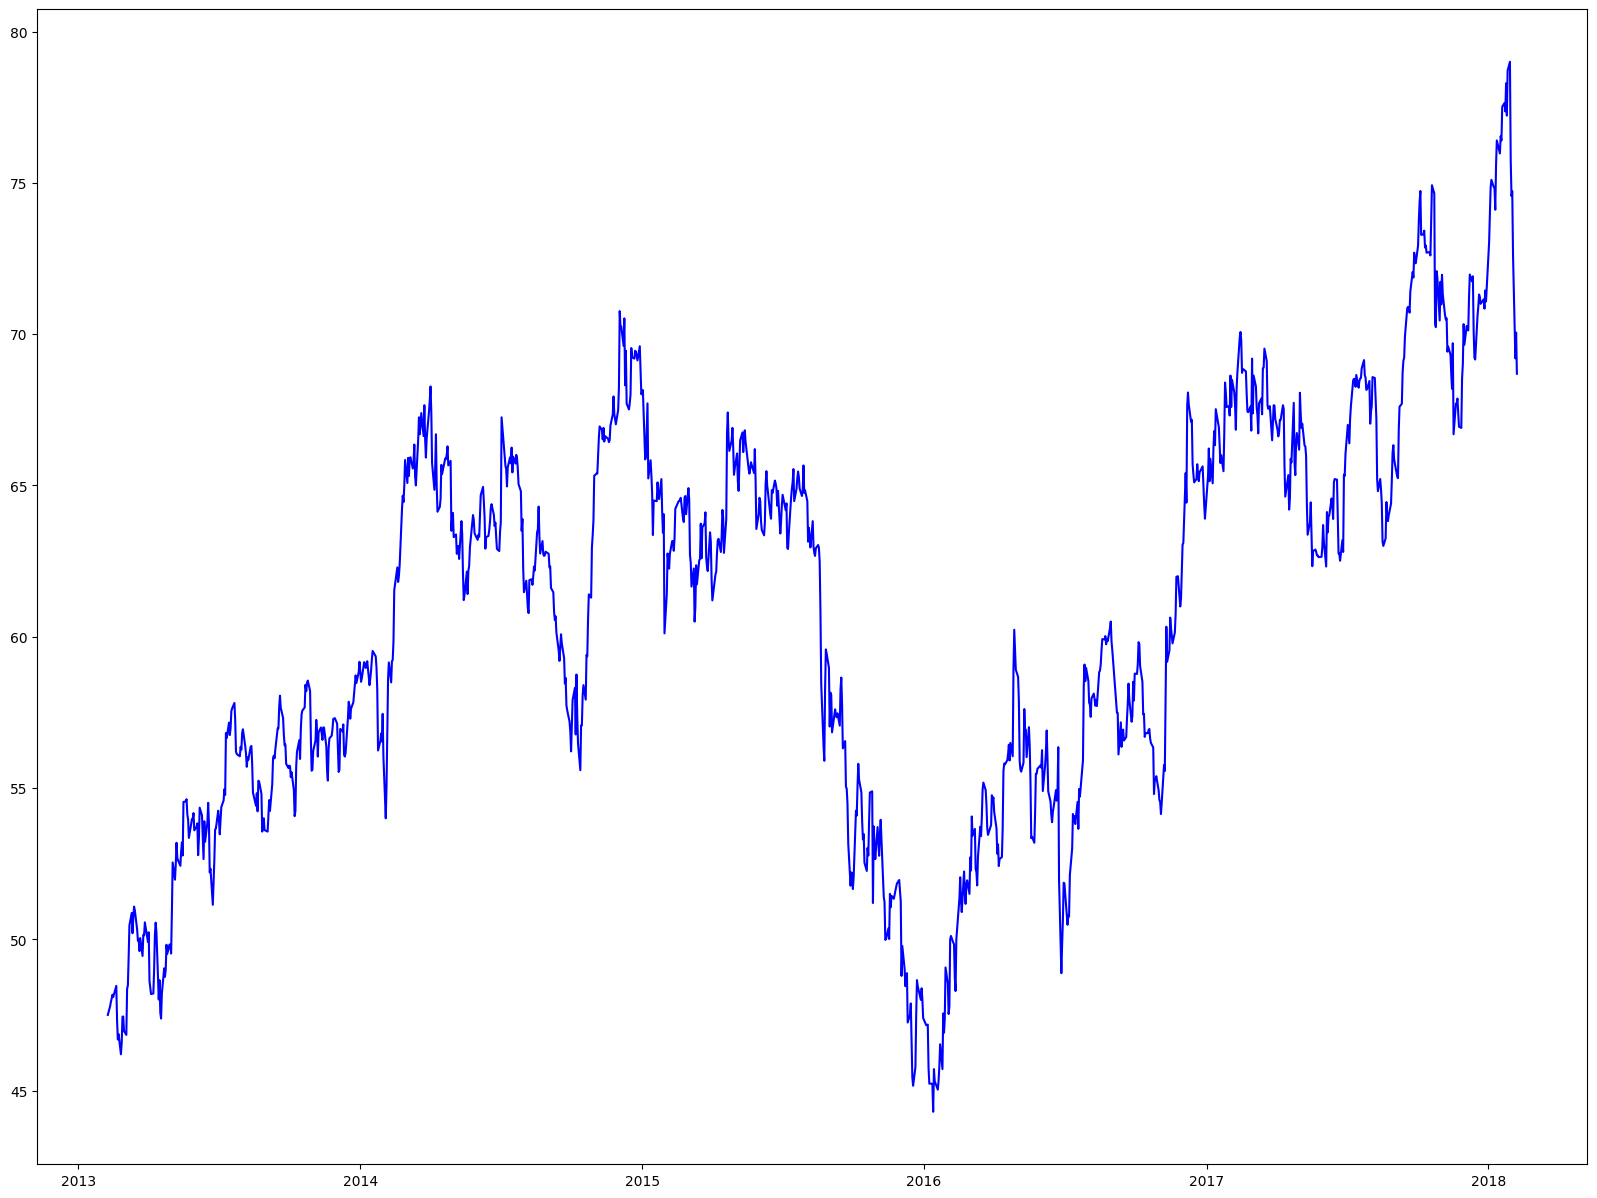

In [17]:
comp_data = df[df['Name']==company]
plt.figure(figsize= (20,15))
plt.plot(comp_data['date'],comp_data['close'],c='blue')
plt.show

In [18]:
close_data = comp_data.filter(['close'])
close_data.head()

,close
437543,47.50
437544,47.79
437545,47.93
437546,48.04
437547,48.17


In [19]:
dataset = close_data.values
print(dataset)

[[47.5 ]
 [47.79]
 [47.93]
 ...
 [69.2 ]
 [70.05]
 [68.69]]


In [20]:
print(close_data.dtypes)

close    float64
dtype: object


In [21]:
training_size = int(np.ceil(len(dataset)*0.8))
training_size

1008

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [23]:
train_data = scaled_data[0:training_size,:]

In [24]:
x_train = []
y_train = []

for i in range(60,training_size):
    x_train.append(train_data[(i-60):i,0])
    y_train.append(train_data[i,0])


In [25]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train)
print(y_train)

[[0.09221902 0.10057637 0.10461095 ... 0.18991354 0.23746398 0.22103746]
 [0.10057637 0.10461095 0.10778098 ... 0.23746398 0.22103746 0.23544669]
 [0.10461095 0.10778098 0.11152738 ... 0.22103746 0.23544669 0.25619597]
 ...
 [0.32449568 0.39365994 0.46195965 ... 0.70115274 0.67118156 0.69711816]
 [0.39365994 0.46195965 0.42853026 ... 0.67118156 0.69711816 0.68501441]
 [0.46195965 0.42853026 0.43948127 ... 0.69711816 0.68501441 0.67233429]]
[0.23544669 0.25619597 0.24178674 0.23948127 0.23429395 0.2481268
 0.25648415 0.24409222 0.29510086 0.29567723 0.29769452 0.28299712
 0.27838617 0.26080692 0.27867435 0.27867435 0.28443804 0.26801153
 0.27146974 0.27463977 0.2443804  0.26051873 0.28962536 0.28213256
 0.26051873 0.24063401 0.27665706 0.25706052 0.27550432 0.29423631
 0.27435159 0.22795389 0.2314121  0.19711816 0.2184438  0.24005764
 0.26887608 0.26974063 0.28674352 0.27752161 0.26426513 0.29020173
 0.29654179 0.30720461 0.30172911 0.36080692 0.35590778 0.37060519
 0.35878963 0.3648415

In [26]:
x_train.shape

(948, 60)

In [27]:
x_train = np.reshape(x_train,(x_train.shape[0],60,1))

In [28]:
print(x_train)

[[[0.09221902]
  [0.10057637]
  [0.10461095]
  ...
  [0.18991354]
  [0.23746398]
  [0.22103746]]

 [[0.10057637]
  [0.10461095]
  [0.10778098]
  ...
  [0.23746398]
  [0.22103746]
  [0.23544669]]

 [[0.10461095]
  [0.10778098]
  [0.11152738]
  ...
  [0.22103746]
  [0.23544669]
  [0.25619597]]

 ...

 [[0.32449568]
  [0.39365994]
  [0.46195965]
  ...
  [0.70115274]
  [0.67118156]
  [0.69711816]]

 [[0.39365994]
  [0.46195965]
  [0.42853026]
  ...
  [0.67118156]
  [0.69711816]
  [0.68501441]]

 [[0.46195965]
  [0.42853026]
  [0.43948127]
  ...
  [0.69711816]
  [0.68501441]
  [0.67233429]]]


In [29]:
import tensorflow as tf 
from tensorflow import keras 

2024-06-02 10:03:25.673522: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 10:03:25.673683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 10:03:25.827882: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [30]:
model = keras.models.Sequential() 
model.add(keras.layers.LSTM(units=64, 
                            return_sequences=True, 
                            input_shape=(x_train.shape[1], 1))) 
model.add(keras.layers.LSTM(units=64)) 
model.add(keras.layers.Dense(32)) 
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(1)) 
model.summary 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<bound method Model.summary of <Sequential name=sequential, built=True>>

In [31]:
model.compile(optimizer='adam', 
              loss='mean_squared_error') 
history = model.fit(x_train, 
                    y_train, 
                    epochs=10) 

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0555
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0130
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0109
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0097
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0096
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0088
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0081
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0078
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0079
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0063


In [32]:
test_data = scaled_data[training_size - 60:, :] 
x_test = [] 
y_test = dataset[training_size:, :] 
for i in range(60, len(test_data)): 
    x_test.append(test_data[i-60:i, 0]) 


In [33]:
x_test = np.array(x_test) 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [34]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


In [35]:
mse = np.mean(((predictions - y_test) ** 2)) 
print("MSE", mse) 
print("RMSE", np.sqrt(mse)) 

MSE 2.5177938839639267
RMSE 1.5867557732568445


<function matplotlib.pyplot.show(close=None, block=None)>

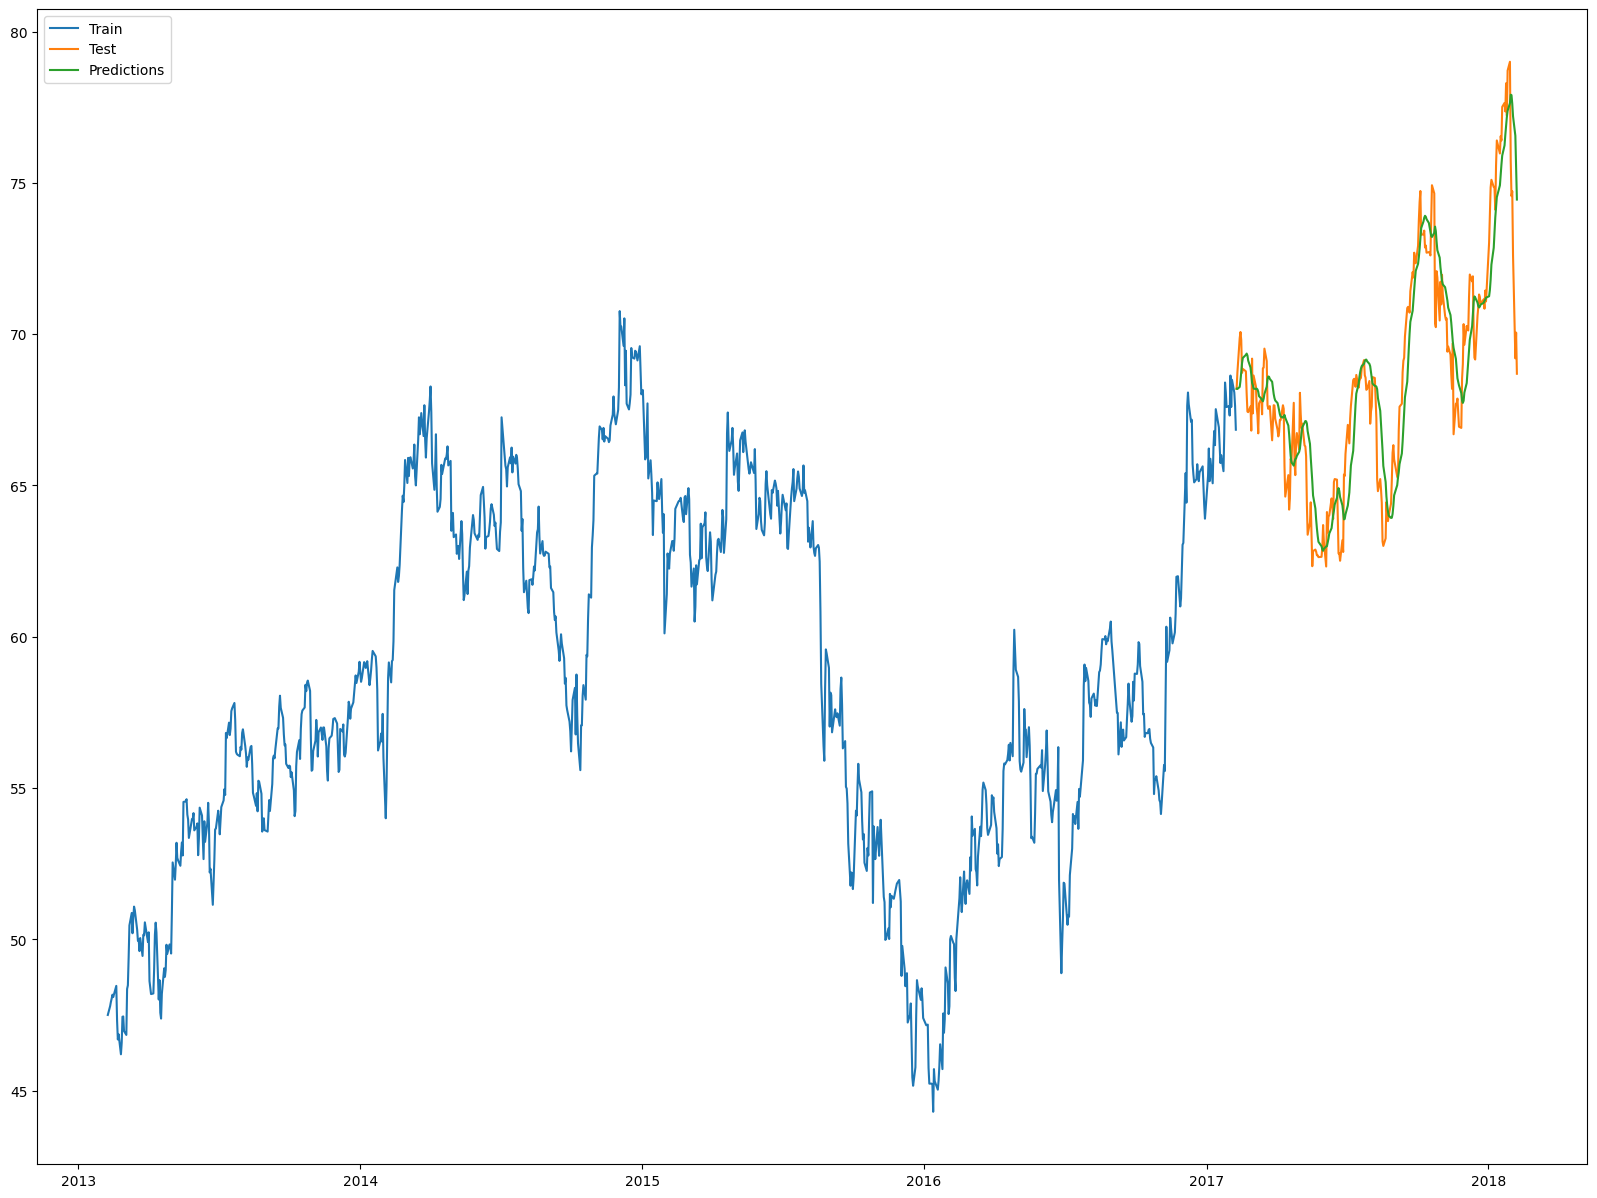

In [36]:
test = comp_data[training_size:]
train = comp_data[:training_size]

plt.figure(figsize = (20,15))
plt.plot(train['date'],train['close'])
plt.plot(test['date'],test['close'])
plt.plot(test['date'],predictions)
plt.legend(['Train', 'Test', 'Predictions'])
plt.show